In [50]:
import pandas as pd
import numpy as np
import matplotlib as mth

'''df.plot()
df[['c1', 'c2']]
Prof. Nicksson Arrais15:31
del df[coluna]
idx = df.index
df.drop(idx)'''

"df.plot()\ndf[['c1', 'c2']]\nProf. Nicksson Arrais15:31\ndel df[coluna]\nidx = df.index\ndf.drop(idx)"

In [156]:
dollar=pd.read_excel("./datas/dolarBRL2011.2021.xlsx")
barril=pd.read_excel("./datas/petroleo.2011.2021.xlsx")
gasolina=pd.read_excel("./datas/mensal-brasil-desde-jan2013.xlsx")

In [ ]:
dollar['V.Médio']=(dollar['Máxima']+dollar['Mínima'])/2
dollar.set_index('Data',inplace=True)
dollar.rename_axis('Período',inplace=True)

C:\Users\ednae\anaconda3\envs\rsd\lib\site-packages\pandas\core\indexing.py:862: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return getattr(section, self.name)[new_key]


<AxesSubplot:xlabel='Período'>

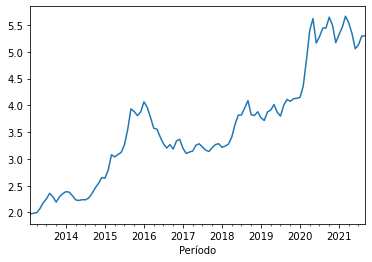

In [173]:
dollar.loc['2013-01-1':,'V.Médio'].plot()

In [194]:
dollar['VU$.Norm']=dollar['V.Médio']/dollar['V.Médio'].max()

C:\Users\ednae\anaconda3\envs\rsd\lib\site-packages\pandas\core\indexing.py:862: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return getattr(section, self.name)[new_key]


<AxesSubplot:xlabel='Período'>

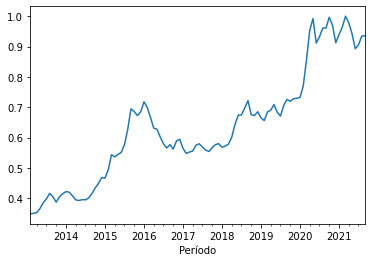

In [195]:
dollar.loc['2013-01-1':,'VU$.Norm'].plot()

In [ ]:
barril['V.Médio']=(barril['Máxima']+barril['Mínima'])/2
barril.set_index('Data',inplace=True)
barril.rename_axis('Período',inplace=True)

C:\Users\ednae\anaconda3\envs\rsd\lib\site-packages\pandas\core\indexing.py:862: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return getattr(section, self.name)[new_key]


<AxesSubplot:xlabel='Período'>

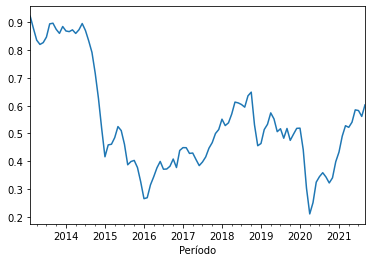

In [196]:
barril['VBar.Norm']=barril['V.Médio']/barril['V.Médio'].max()
barril.loc['2013-01-1':,'VBar.Norm'].plot()

Tratamento da base que contém variação da gasolina

In [121]:
#REMOÇÃO DAS COLUNAS INDESEJADAS
gasolina.drop('NÚMERO DE POSTOS PESQUISADOS',axis=1,inplace=True)
#especifico a coluna que desejo, axis=1 é para coluna. inplace muda a bse original
gasolina.drop('DESVIO PADRÃO REVENDA',axis=1,inplace=True)
gasolina.drop('PREÇO MÍNIMO REVENDA',axis=1,inplace=True)
gasolina.drop('PREÇO MÁXIMO REVENDA',axis=1,inplace=True)
gasolina.drop(['DESVIO PADRÃO DISTRIBUIÇÃO','PREÇO MÍNIMO DISTRIBUIÇÃO','PREÇO MÁXIMO DISTRIBUIÇÃO'],axis=1,inplace=True)

In [ ]:
df_gasolina=gasolina[gasolina.iloc[0:,1]=='GASOLINA COMUM']
df_gasolina.set_index(df_gasolina['MÊS'],inplace=True)
df_gasolina.rename_axis(index={'MÊS':'Período'},inplace=True)
df_gasolina.drop('MÊS',axis=1,inplace=True)

In [192]:
df_gasolina['PMVGas.Norm']=df_gasolina['PREÇO MÉDIO REVENDA']/df_gasolina['PREÇO MÉDIO REVENDA'].max()

<AxesSubplot:xlabel='Período'>

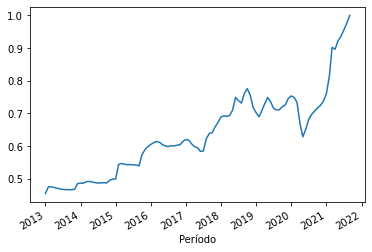

In [193]:
df_gasolina['PMVGas.Norm'].plot()

C:\Users\ednae\anaconda3\envs\rsd\lib\site-packages\pandas\core\indexing.py:862: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return getattr(section, self.name)[new_key]
C:\Users\ednae\anaconda3\envs\rsd\lib\site-packages\pandas\core\indexing.py:862: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return getattr(section, self.name)[new_key]


<AxesSubplot:xlabel='Período'>

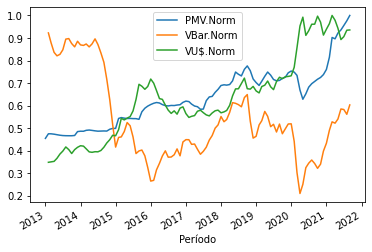

In [197]:
df_gasolina['PMV.Norm'].plot(legend=True)
barril.loc['2013-01-1':,'VBar.Norm'].plot(legend=True)
dollar.loc['2013-01-1':,'VU$.Norm'].plot(legend=True)

In [216]:
frames = pd.concat([df_gasolina['PMV.Norm'],barril.loc['2013-01-1':,'VBar.Norm'],dollar.loc['2013-01-1':,'VU$.Norm']],axis=1)
frames.corr()

C:\Users\ednae\anaconda3\envs\rsd\lib\site-packages\pandas\core\indexing.py:862: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return getattr(section, self.name)[new_key]


,PMV.Norm,VBar.Norm,VU$.Norm
PMV.Norm,1.000000,-0.388830,0.832829
VBar.Norm,-0.388830,1.000000,-0.639191
VU$.Norm,0.832829,-0.639191,1.000000


In [218]:
frames.loc['2015-01-01':'2019-01-01'].corr()
#analisando apenas o período em questão

,PMV.Norm,VBar.Norm,VU$.Norm
PMV.Norm,1.000000,0.655776,0.504830
VBar.Norm,0.655776,1.000000,0.026837
VU$.Norm,0.504830,0.026837,1.000000


In [219]:
frames.loc['2015-01-01':].corr()

,PMV.Norm,VBar.Norm,VU$.Norm
PMV.Norm,1.000000,0.525400,0.694387
VBar.Norm,0.525400,1.000000,-0.120171
VU$.Norm,0.694387,-0.120171,1.000000
